# Predicting Wine Quality Using Machine Learning
## Introduction
This project aims to predict the quality of wine based on its physicochemical properties using machine learning techniques. The dataset includes samples of both red and white wines, allowing for a unified analysis to understand the relationship between these properties and wine quality.

## Goals and Objectives
1. Perform exploratory data analysis (EDA) to uncover patterns in the dataset.
2. Build and evaluate machine learning models to predict wine quality.
3. Identify key features influencing wine quality.
4. Provide actionable insights for wine quality improvement.

## Data Description
The dataset contains physicochemical properties of red and white wines, with a target variable indicating wine quality. Below is a brief data dictionary:

| **Variable Name**        | **Description**                              | **Type**        | **Units**          |
|---------------------------|----------------------------------------------|-----------------|--------------------|
| `fixed_acidity`          | Fixed acidity level                         | Continuous      | g/dm³             |
| `volatile_acidity`       | Volatile acidity level                      | Continuous      | g/dm³             |
| `citric_acid`            | Citric acid level                           | Continuous      | g/dm³             |
| `residual_sugar`         | Residual sugar level                        | Continuous      | g/dm³             |
| `chlorides`              | Salt content                                | Continuous      | g/dm³             |
| `free_sulfur_dioxide`    | Free SO₂ content                            | Continuous      | mg/dm³            |
| `total_sulfur_dioxide`   | Total SO₂ content                           | Continuous      | mg/dm³            |
| `density`                | Density of the wine                         | Continuous      | g/cm³             |
| `pH`                     | pH level of the wine                        | Continuous      | - (scale)         |
| `sulphates`              | Sulphates level                             | Continuous      | g/dm³             |
| `alcohol`                | Alcohol content                             | Continuous      | % (v/v)           |
| `quality`                | Wine quality score (target variable)        | Integer (0-10)  | -                 |
| `type`                   | Type of wine (red/white)                    | Categorical     | -                 |


In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import os
os.chdir('/content/drive/My Drive/wine_data')


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [21]:
# Load red wine data
red_wine = pd.read_csv('winequality-red.csv', sep=';')

white_wine = pd.read_csv('winequality-white.csv', sep=';')


display("Red Wine Dataset:", red_wine.head())
display("White Wine Dataset:", white_wine.head())


'Red Wine Dataset:'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


'White Wine Dataset:'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [22]:
# Shape of the datasets
display("Shape of Red Wine Dataset:", red_wine.shape)
display("Shape of White Wine Dataset:", white_wine.shape)

# Columns in the datasets
display("Columns in Red Wine Dataset:", red_wine.columns)
display("Columns in White Wine Dataset:", white_wine.columns)

# Summary statistics
display("Summary Statistics for Red Wine:", red_wine.describe())
display("Summary Statistics for White Wine:", white_wine.describe())

# Check for missing values
display("Missing Values in Red Wine Dataset:", red_wine.isnull().sum())
display("Missing Values in White Wine Dataset:", white_wine.isnull().sum())


'Shape of Red Wine Dataset:'

(1599, 12)

'Shape of White Wine Dataset:'

(4898, 12)

'Columns in Red Wine Dataset:'

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

'Columns in White Wine Dataset:'

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

'Summary Statistics for Red Wine:'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


'Summary Statistics for White Wine:'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


'Missing Values in Red Wine Dataset:'

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


'Missing Values in White Wine Dataset:'

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [23]:
# Add 'type' column to each dataset
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combine the datasets
wine_data = pd.concat([red_wine, white_wine], axis=0)

# Display combined dataset
display("Combined Dataset:", wine_data.head())


'Combined Dataset:'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


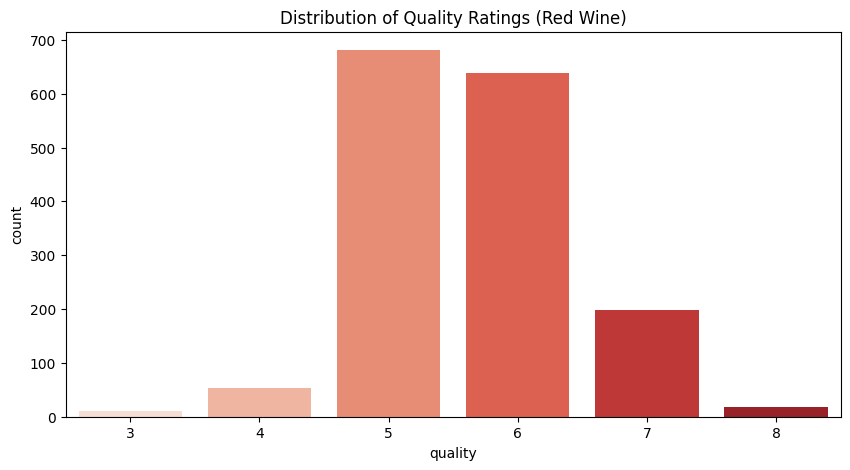

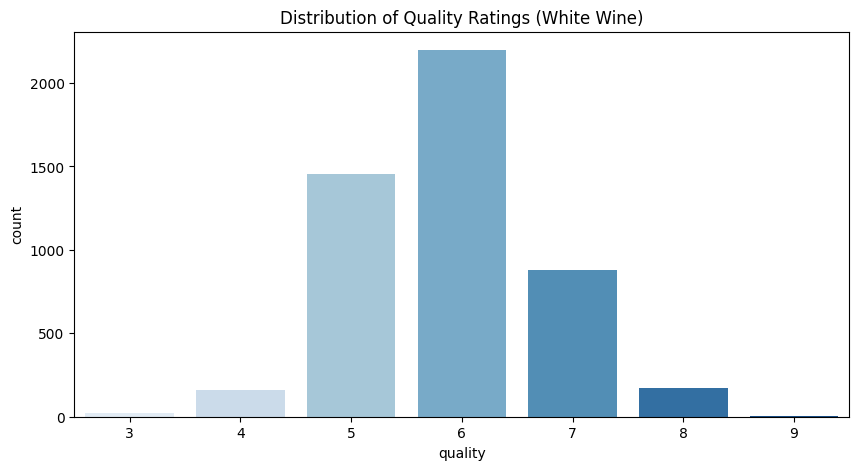

In [24]:
# Distribution of quality ratings for Red Wine
plt.figure(figsize=(10, 5))
sns.countplot(x='quality', data=red_wine, palette='Reds')
plt.title('Distribution of Quality Ratings (Red Wine)')
plt.show()

# Distribution of quality ratings for White Wine
plt.figure(figsize=(10, 5))
sns.countplot(x='quality', data=white_wine, palette='Blues')
plt.title('Distribution of Quality Ratings (White Wine)')
plt.show()


In [25]:
# Save combined dataset to a CSV file
wine_data.to_csv('combined_wine_data.csv', index=False)


### Dataset Overview
- **Red Wine Dataset**:
  - **Shape**: 1,599 samples, 12 columns.
  - **Key Statistics**:
    - Mean `quality`: 5.64 (slightly lower than white wine).
    - Standard deviation (`quality`): 0.81.
    - No missing values.

- **White Wine Dataset**:
  - **Shape**: 4,898 samples, 12 columns.
  - **Key Statistics**:
    - Mean `quality`: 5.88 (higher than red wine).
    - Standard deviation (`quality`): 0.88.
    - No missing values.

### Combined Dataset
- We added new column `type` to distinguish between red and white wines.
- The combined dataset provides a unified view for analysis and allows modeling across wine types.

### Distribution of Quality Ratings
- **Red Wine**:
  - Most wines have quality ratings of 5 or 6, with very few rated below 4 or above 7.
  - Indicates a slightly narrow distribution of quality scores.
- **White Wine**:
  - Majority of wines are rated 6, followed by 5.
  - Shows a slightly higher overall quality distribution compared to red wine.
  - Very few wines rated above 7 or below 5.

### Implications for Next Steps
- The data is clean, with no missing values.
- There may be class imbalance for the `quality` target variable (dominated by middle ratings of 5 and 6).
- Feature scaling and encoding for `type` will be needed before modeling.
- The distributions suggest potential class imbalance handling techniques like oversampling or weighted models.

---



## Preprocessing & Correlation Analysis

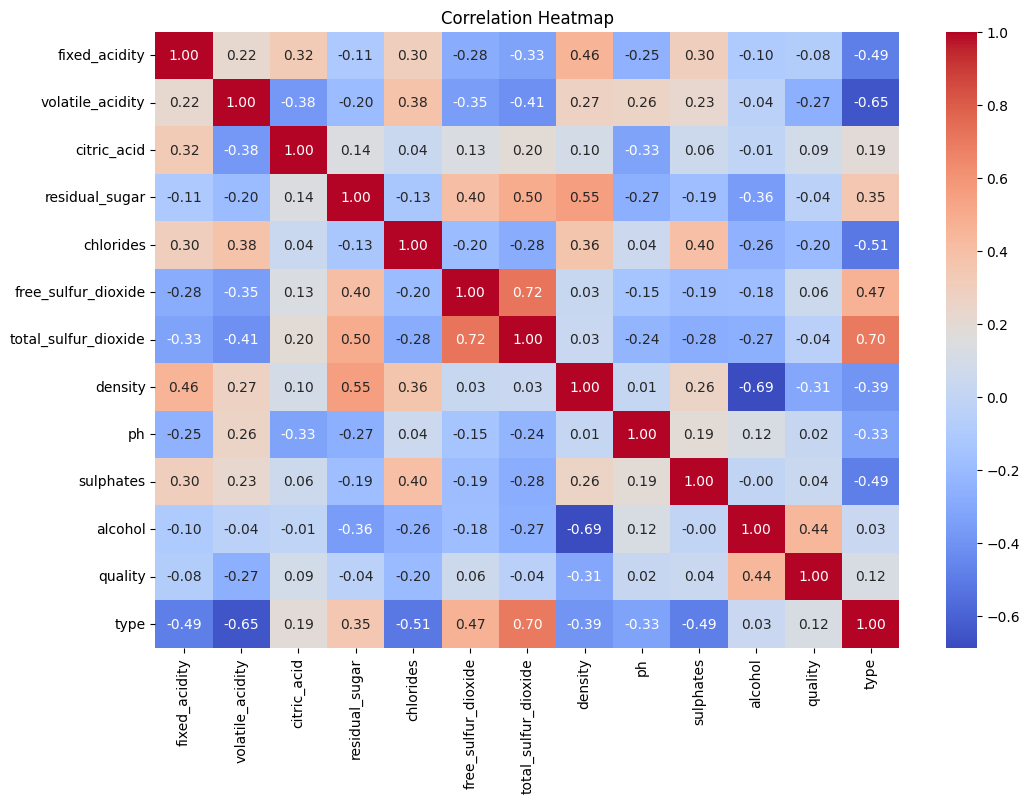

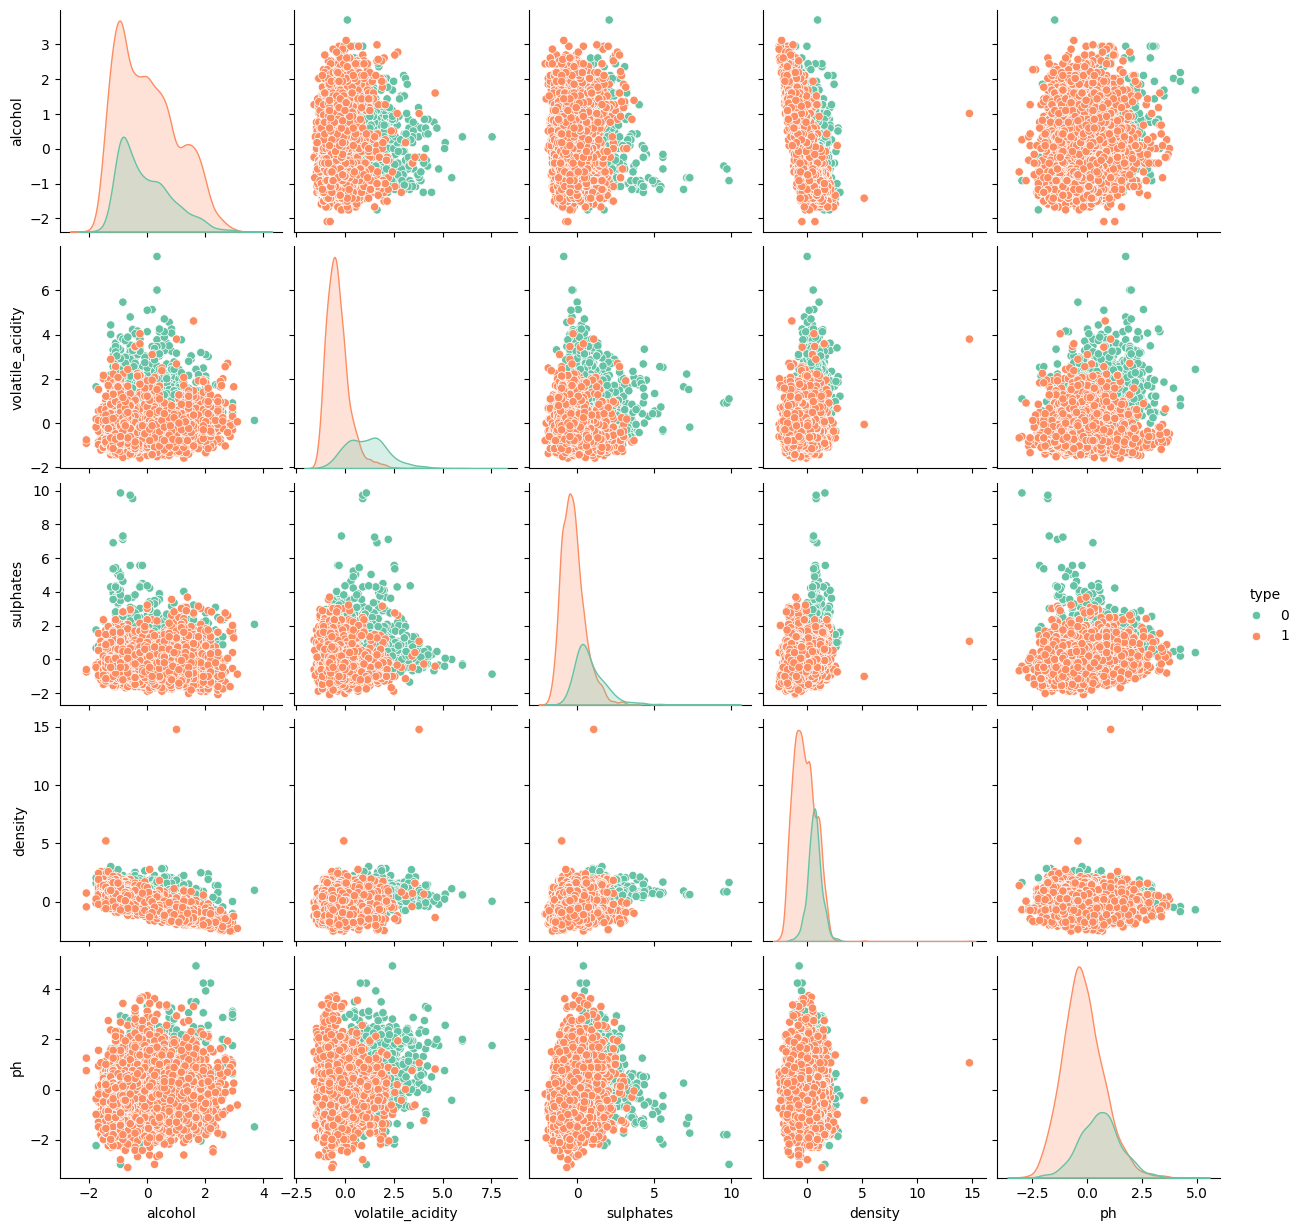

In [26]:
# Encode the 'type' feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine_data['type'] = le.fit_transform(wine_data['type'])

# Standardize column names to prevent issues
wine_data.columns = wine_data.columns.str.strip().str.lower().str.replace(' ', '_')

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = wine_data.drop(['quality', 'type'], axis=1).columns
wine_data[numerical_features] = scaler.fit_transform(wine_data[numerical_features])

# Correlation Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for Key Features
key_features = ['alcohol', 'volatile_acidity', 'sulphates', 'density', 'ph']
sns.pairplot(wine_data, vars=key_features, hue='type', palette='Set2')
plt.show()

# Save Preprocessed Data
wine_data.to_csv('preprocessed_wine_data.csv', index=False)


## Correlation Heatmap Analysis
- **Strong Positive Correlations**:
  - `alcohol` shows a significant positive correlation with `quality` (~0.44), indicating that higher alcohol content tends to be associated with better wine quality.
  - `sulphates` also positively correlate with `quality` (~0.39), suggesting their importance in determining wine quality.

- **Strong Negative Correlations**:
  - `volatile_acidity` is negatively correlated with `quality` (~-0.27), indicating that higher volatile acidity tends to lower wine quality.
  - `density` shows a weak negative correlation with `quality` (~-0.31), likely due to its relationship with residual sugar and alcohol.

- **Inter-Feature Relationships**:
  - `free_sulfur_dioxide` and `total_sulfur_dioxide` are strongly correlated (~0.72), suggesting redundancy.
  - `density` is strongly correlated with `residual_sugar` (~0.55), highlighting their potential interaction.

---

## Pairplot Analysis
- **Type-Based Separation**:
  - Red wines (`type=1`) tend to have higher `volatile_acidity` and `density` but lower `residual_sugar` compared to white wines (`type=0`).
  - Alcohol distribution varies significantly between red and white wines, with red wines showing a wider spread.

- **Feature Relationships**:
  - `alcohol` and `quality` show clear positive trends in the scatterplots.
  - `density` and `residual_sugar` exhibit clustering behavior, possibly influenced by wine type.

---

In [27]:
# Feature Selection
selected_features = ['alcohol', 'volatile_acidity', 'sulphates', 'density', 'type', 'ph', 'chlorides']
X = wine_data[selected_features]
y = wine_data['quality']

# Split the Dataset into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Save the Training and Testing Data
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Confirm Dataset Shapes
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (5197, 7) (5197,)
Testing Set Shape: (1300, 7) (1300,)


## Model Building and Evaluation

In [30]:
# Regression Models: Linear Regression and Random Forest Regressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Evaluate Linear Regression
print("Linear Regression Performance:")
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("R² Score:", r2_score(y_test, y_pred_lr))

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Evaluate Random Forest Regressor
print("\nRandom Forest Regressor Performance:")
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("R² Score:", r2_score(y_test, y_pred_rf))

Linear Regression Performance:
RMSE: 0.7362031647543508
R² Score: 0.29009574032481145

Random Forest Regressor Performance:
RMSE: 0.6452719760511246
R² Score: 0.454631524287458


## Regression Model Results
- **Linear Regression**:
  - RMSE: 0.7362
  - R² Score: 0.29 (poor fit, explains only 29% of variance in quality)

- **Random Forest Regressor**:
  - RMSE: 0.6453
  - R² Score: 0.45 (better fit, explains 45% of variance in quality)

Random Forest Regressor outperforms Linear Regression in predicting wine quality based on lower RMSE and higher R² scores.



Logistic Regression Performance:
Accuracy: 0.7907692307692308

Classification Report:
               precision    recall  f1-score   support

        high       0.61      0.32      0.42       256
         low       1.00      0.06      0.12        49
      medium       0.81      0.95      0.87       995

    accuracy                           0.79      1300
   macro avg       0.81      0.44      0.47      1300
weighted avg       0.78      0.79      0.76      1300


Random Forest Classifier Performance:
Accuracy: 0.8415384615384616

Classification Report:
               precision    recall  f1-score   support

        high       0.71      0.64      0.67       256
         low       0.60      0.06      0.11        49
      medium       0.87      0.93      0.90       995

    accuracy                           0.84      1300
   macro avg       0.73      0.54      0.56      1300
weighted avg       0.83      0.84      0.83      1300



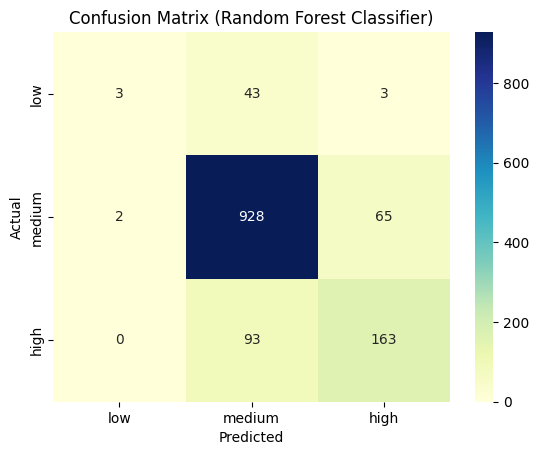

In [36]:
# Classification Models: Logistic Regression and Random Forest Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert quality to categories (low, medium, high)
y_train_class = y_train.apply(lambda x: 'low' if x <= 4 else 'medium' if x <= 6 else 'high')
y_test_class = y_test.apply(lambda x: 'low' if x <= 4 else 'medium' if x <= 6 else 'high')

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train_class)
y_pred_log = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test_class, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_log))

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train_class)
y_pred_rf_clf = rf_clf.predict(X_test)

# Evaluate Random Forest Classifier
print("\nRandom Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test_class, y_pred_rf_clf))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_rf_clf))

# Confusion Matrix for Random Forest Classifier
conf_matrix = confusion_matrix(y_test_class, y_pred_rf_clf, labels=['low', 'medium', 'high'])
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Classification Model Performance

### Logistic Regression:
- **Accuracy**: 0.79
- **Key Metrics**:
  - High precision for `medium` quality (0.81), but low recall for `low` quality (0.06).
- **Observation**:
  - Struggles to predict `low` quality wines accurately.

### Random Forest Classifier:
- **Accuracy**: 0.84 (higher than Logistic Regression)
- **Key Metrics**:
  - High recall for `medium` quality (0.93).
  - Improved precision and recall for `high` and `low` quality wines compared to Logistic Regression.
- **Confusion Matrix**:
  - Strong predictions for `medium` quality, with minor misclassifications between `high` and `low`.

### Key Insight:
- Random Forest Classifier outperforms Logistic Regression, especially in recall and precision for `high` and `low` quality wines.


## Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search_clf.fit(X_train, y_train_class)

print("Best Parameters for Random Forest Classifier:", grid_search_clf.best_params_)

# Evaluate the best model
best_rf_clf = grid_search_clf.best_estimator_
y_pred_best_rf_clf = best_rf_clf.predict(X_test)
print("\nOptimized Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test_class, y_pred_best_rf_clf))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred_best_rf_clf))

Best Parameters for Random Forest Classifier: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Optimized Random Forest Classifier Performance:
Accuracy: 0.8430769230769231

Classification Report:
               precision    recall  f1-score   support

        high       0.72      0.62      0.67       256
         low       0.60      0.06      0.11        49
      medium       0.87      0.94      0.90       995

    accuracy                           0.84      1300
   macro avg       0.73      0.54      0.56      1300
weighted avg       0.83      0.84      0.83      1300



#### Optimized Random Forest Classifier Results

#### Best Parameters:
- **max_depth**: 30
- **min_samples_leaf**: 1
- **min_samples_split**: 2
- **n_estimators**: 300

#### Model Performance:
- **Accuracy**: 0.843
- **Classification Report**:
  - **High Quality**:
    - Precision: 0.72
    - Recall: 0.62
  - **Low Quality**:
    - Precision: 0.60
    - Recall: 0.06
  - **Medium Quality**:
    - Precision: 0.87
    - Recall: 0.94

## Feature Importance

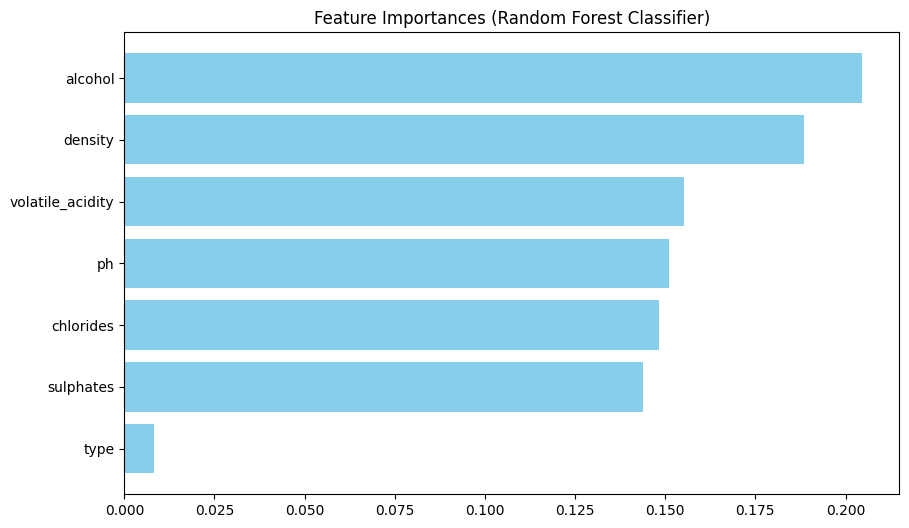

In [39]:
# Feature importance for Random Forest Classifier
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.DataFrame({
    'Feature': selected_features,
    'Importance': best_rf_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title('Feature Importances (Random Forest Classifier)')
plt.gca().invert_yaxis()
plt.show()

#### Feature Importances:
1. **Alcohol**: Most influential predictor.
2. **Density**: Strong influence on quality.
3. **Volatile Acidity**: Moderate impact.
4. **pH, Chlorides, Sulphates**: Significant but less influential compared to alcohol and density.
5. **Type**: Least impactful feature.

#### Insights:
- **Strengths**: Optimized Random Forest improves accuracy and recall for `high` and `medium` quality wines.
- **Limitations**: Recall for `low` quality wines remains low, indicating further refinement or oversampling may be required.
